# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_data_df = pd.merge(study_results,mouse_metadata,how = 'left')

# Display the data table for preview
full_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
full_data_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicated_rows = full_data_df[full_data_df.duplicated(['Mouse ID','Timepoint'],keep = False)]
print(duplicated_rows['Mouse ID'].unique())

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = pd.DataFrame(duplicated_rows)
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates
final_data_df = full_data_df.drop(full_data_df[full_data_df['Mouse ID'] =='g989'].index)
final_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
final_data_df['Mouse ID'].nunique() 

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_df = final_data_df.groupby('Drug Regimen')

mean_tv = grouped_df['Tumor Volume (mm3)'].apply(np.mean)
median_tv = grouped_df['Tumor Volume (mm3)'].apply(np.median)
variance_tv = grouped_df['Tumor Volume (mm3)'].apply(np.var)
sd_tv = grouped_df['Tumor Volume (mm3)'].apply(np.std)
sem_tv = grouped_df['Tumor Volume (mm3)'].apply(st.sem)

tumor_stats_df = pd.DataFrame({'Mean Tumor Volume': mean_tv, 
                              'Median Tumor Volume': median_tv, 
                              'Tumor Volume Variance': variance_tv, 
                              'Tumor Volume Std. Dev.': sd_tv, 
                              'Tumor Volume Std. Err.': sem_tv})
tumor_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line    
#Source: https://stackoverflow.com/questions/44635626/rename-result-columns-from-pandas-aggregation-futurewarning-using-a-dict-with
tumor_stats_agg_df = final_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var, np.std, st.sem])
#tumor_stats_agg_df = tumor_stats_agg_df.columns = ['Mean Tumor Volume',
 #                                                 'Median Tumor Volume',
  #                                                'Tumor Volume Variance',
   #                                               'Tumor Volume Std. Dev.', 
    #                                              'Tumor Volume Std. Err.']
tumor_stats_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

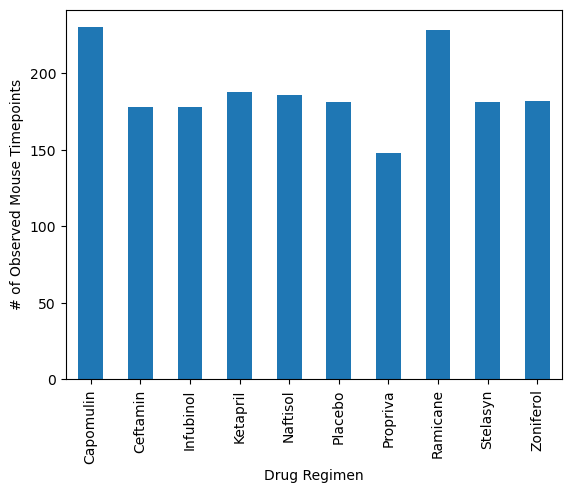

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count_df = pd.DataFrame(grouped_df['Drug Regimen'].count())
drug_count_df.plot(kind='bar',legend = False)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

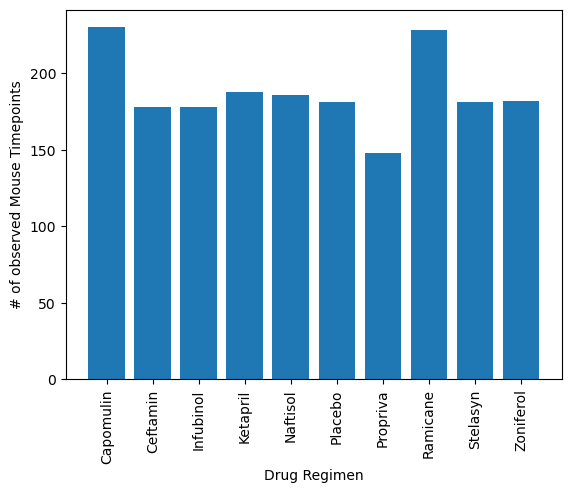

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(grouped_df))
tick_locations = [value for value in x_axis]

plt.bar(x_axis,(grouped_df['Drug Regimen'].count()), align = 'center')
plt.xticks(tick_locations, grouped_df['Drug Regimen'].first(), rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.show()

array([<Axes: ylabel='Sex'>], dtype=object)

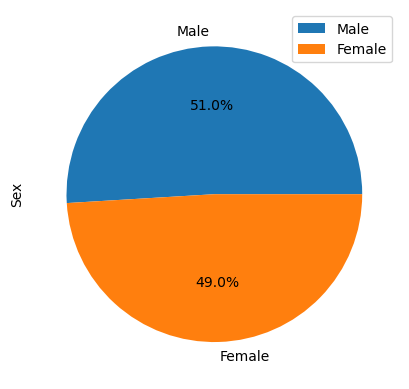

In [212]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = pd.DataFrame((final_data_df['Sex']).value_counts())
sex_df.plot(kind='pie',autopct='%1.1f%%',subplots=True,ylabel= 'Sex')

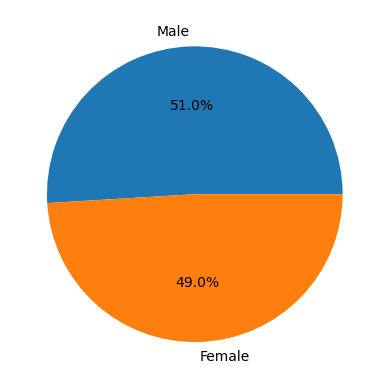

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
counts = final_data_df['Sex'].value_counts()
sizes = [counts["Male"],counts["Female"]]
plt.pie(sizes,autopct='%1.1f%%',labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = final_data_df.groupby('Mouse ID')
last_tp_df = last_tp_df.last()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_last_tp_df = pd.merge(last_tp_df, final_data_df, on ="Tumor Volume (mm3)")
tumor_vol_last_tp_df

,Timepoint_x,Tumor Volume (mm3),Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Mouse ID,Timepoint_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,45,67.973419,2,Infubinol,Female,20,23,a203,45,2,Infubinol,Female,20,23
1,45,65.525743,1,Infubinol,Female,21,25,a251,45,1,Infubinol,Female,21,25
2,45,70.717621,4,Placebo,Female,17,29,a262,45,4,Placebo,Female,17,29
3,45,62.999356,3,Ceftamin,Female,20,28,a275,45,3,Ceftamin,Female,20,28
4,30,63.440686,1,Stelasyn,Female,16,29,a366,30,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,10,48.710661,0,Propriva,Female,12,26,z435,10,0,Propriva,Female,12,26
3208,45,30.638696,0,Ramicane,Male,11,16,z578,45,0,Ramicane,Male,11,16
3209,45,62.754451,3,Infubinol,Female,24,25,z581,45,3,Infubinol,Female,24,25
3210,45,65.741070,3,Naftisol,Female,13,29,z795,45,3,Naftisol,Female,13,29


In [202]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = tumor_vol_last_tp_df['Drug Regimen_y'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    for i, row in tumor_vol_last_tp_df.iterrows():
        if (tumor_vol_last_tp_df.iloc[i,3]) == drug:
            tumor_vol_data.append(tumor_vol_last_tp_df.iloc[i,1])
    tumor_df = pd.DataFrame(tumor_vol_data)
    quartiles = tumor_df.quantile([.25,.5,.75])
    lowerq = quartiles.loc[.25]
    upperq = quartiles.loc[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    for vol in tumor_df:    
        if (vol < lower_bound[0]) or (vol > upper_bound[0]):
            outliers.append(tumor_df[vol])
    print(f'{drug}\'s IQR is {iqr} and the potential outliers are:{outliers}' )
    tumor_vol_data = []
    outliers = []
       
            

Infubinol's IQR is 0    11.477135
dtype: float64 and the potential outliers are:[0     67.973419
1     65.525743
2     57.031862
3     66.083066
4     72.226731
5     36.321346
6     60.969711
7     62.435404
8     60.918767
9     67.289621
10    66.196912
11    62.117279
12    47.010364
13    60.165180
14    55.629428
15    45.699331
16    54.656549
17    55.650681
18    46.250112
19    54.048608
20    51.542431
21    50.005138
22    58.268442
23    67.685569
24    62.754451
Name: 0, dtype: float64]
Placebo's IQR is 0    0.0
dtype: float64 and the potential outliers are:[0      70.717621
1      72.255963
2      45.000000
3      45.000000
4      45.000000
         ...    
267    50.649038
268    52.614689
269    68.134288
270    58.634971
271    66.842635
Name: 0, Length: 272, dtype: float64]
Ceftamin's IQR is 0    0.0
dtype: float64 and the potential outliers are:[0       62.999356
1       45.000000
2       45.000000
3       45.000000
4       45.000000
          ...    
1008    67.527

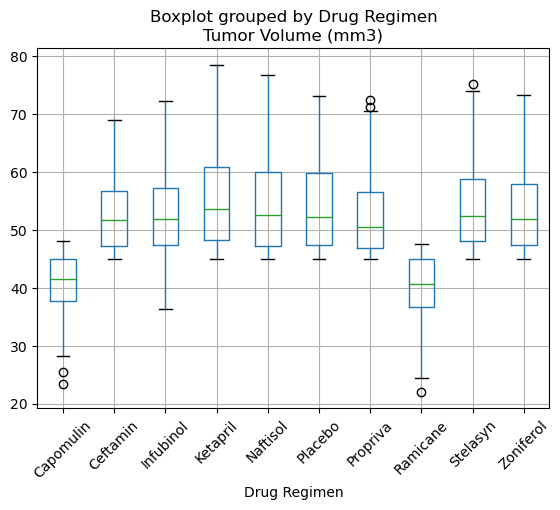

In [144]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = final_data_df.boxplot(by ='Drug Regimen', column = ['Tumor Volume (mm3)'], rot=45)

## Line and Scatter Plots

<Axes: xlabel='Timepoint'>

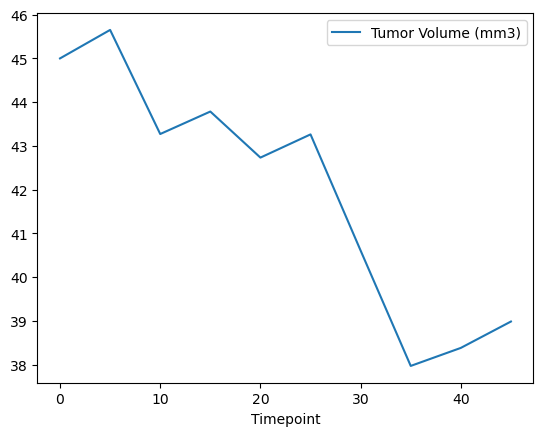

In [148]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
filt = (final_data_df['Mouse ID']== 'b128')
b128_df = final_data_df.loc[filt]
b128_df.plot.line(x='Timepoint', y= 'Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

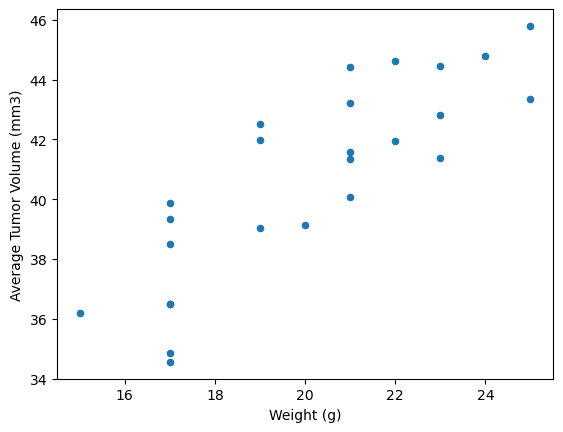

In [180]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
filt2 = (final_data_df['Drug Regimen']== 'Capomulin')
capomulin_df = final_data_df.loc[filt2]
mouse_grouped_df =capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].agg([np.mean])
cap_mouse_df =  pd.merge(mouse_grouped_df,capomulin_df[['Mouse ID','Weight (g)']],on = 'Mouse ID')
cap_mouse_df = cap_mouse_df.drop_duplicates()

plot = cap_mouse_df.plot.scatter(x = 'Weight (g)',y='mean')
plot.set_ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient between weight and average tumor volume is 0.84


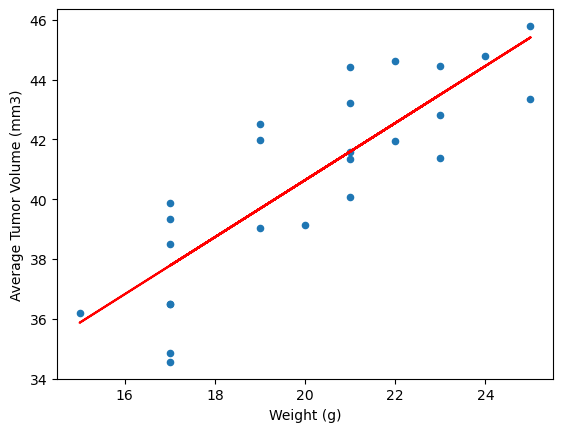

In [183]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plot = cap_mouse_df.plot.scatter(x = 'Weight (g)',y='mean')
plot.set_ylabel('Average Tumor Volume (mm3)')
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(cap_mouse_df['Weight (g)'], cap_mouse_df['mean'])
m_fit = m_slope * cap_mouse_df['Weight (g)'] + m_int

plt.plot(cap_mouse_df['Weight (g)'], m_fit, "-", color ='r')

print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(cap_mouse_df['Weight (g)'],cap_mouse_df['mean'])[0],2)}")